In [167]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset:

In [168]:
# fetch dataset
in_vehicle_coupon_recommendation = fetch_ucirepo(id=603)

# data (as pandas dataframes)
X = in_vehicle_coupon_recommendation.data.features
y = in_vehicle_coupon_recommendation.data.targets
X = pd.concat([X,y], axis = 1)   # Merge the two Dataset into one

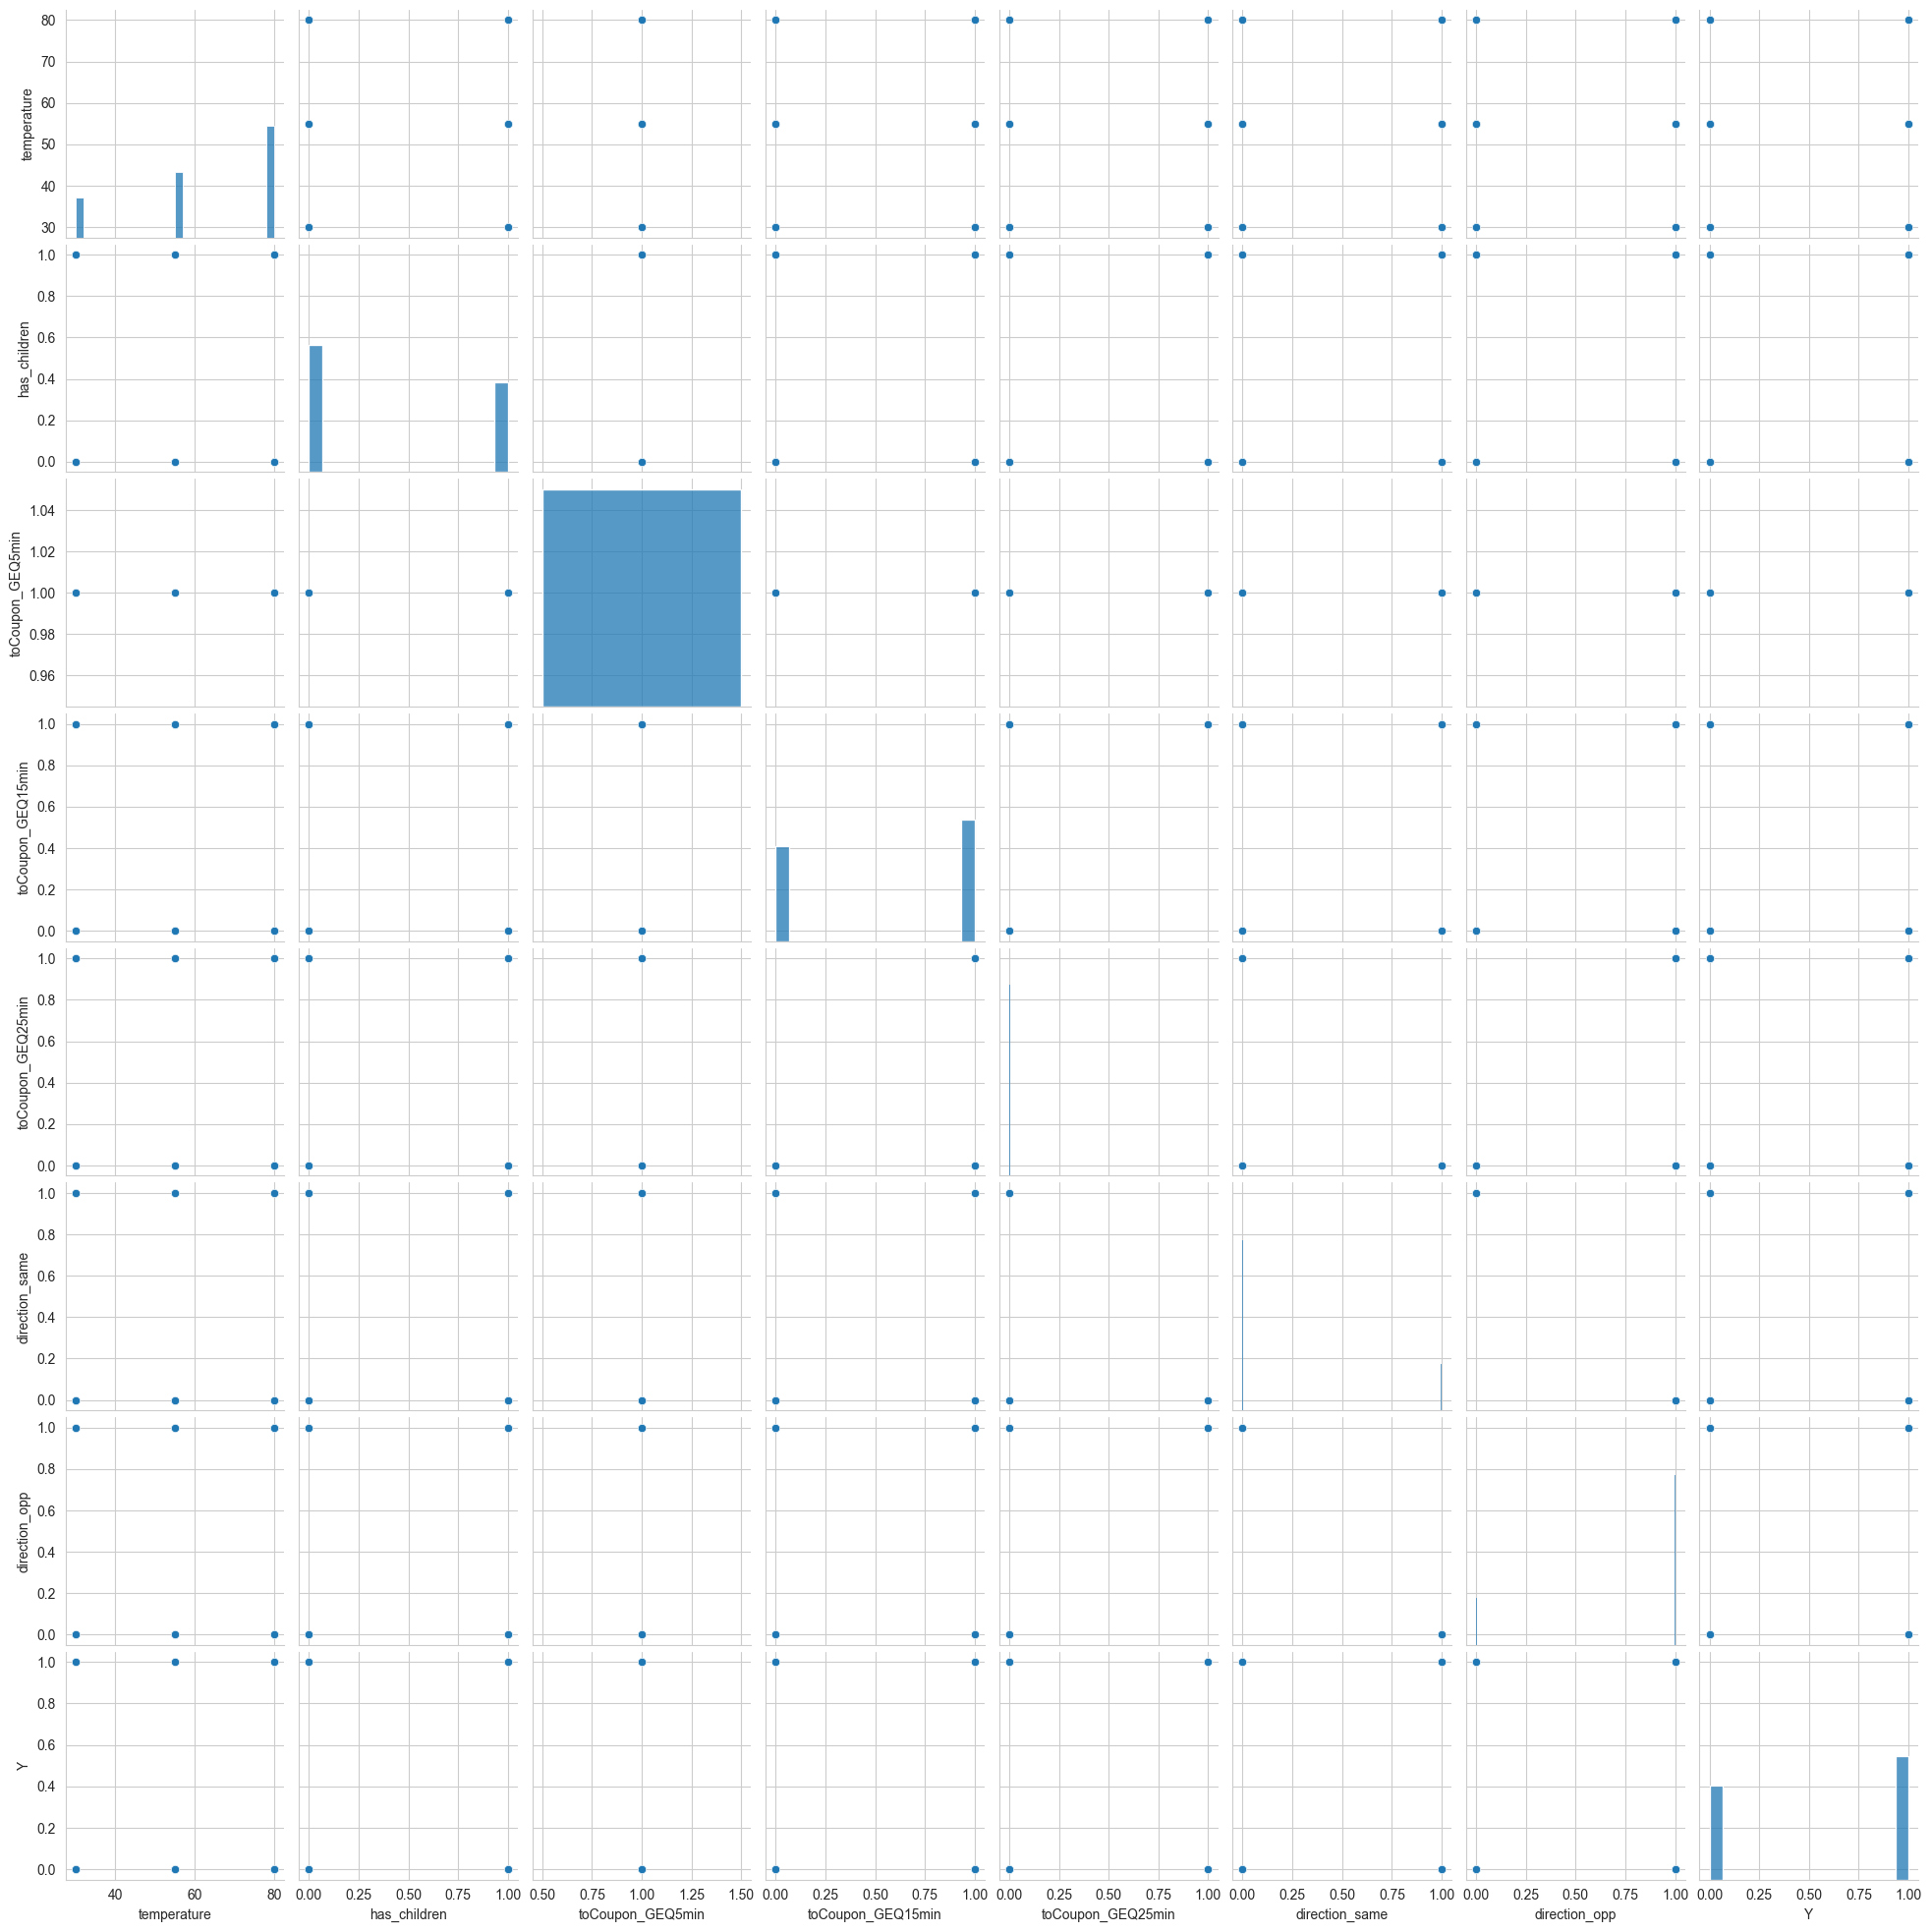

In [169]:
sns.pairplot(X)

In [134]:
X['Y'].value_counts()

Y
1    6877
0    5202
Name: count, dtype: int64

In [172]:
corr_matrix = X.corr(numeric_only='True')  # calculate correlation
target_corr = corr_matrix['Y'].sort_values(ascending=False)

print(target_corr)


Y                    1.000000
temperature          0.061240
direction_same       0.014570
direction_opp       -0.014570
has_children        -0.045557
toCoupon_GEQ15min   -0.081602
toCoupon_GEQ25min   -0.103633
toCoupon_GEQ5min          NaN
Name: Y, dtype: float64


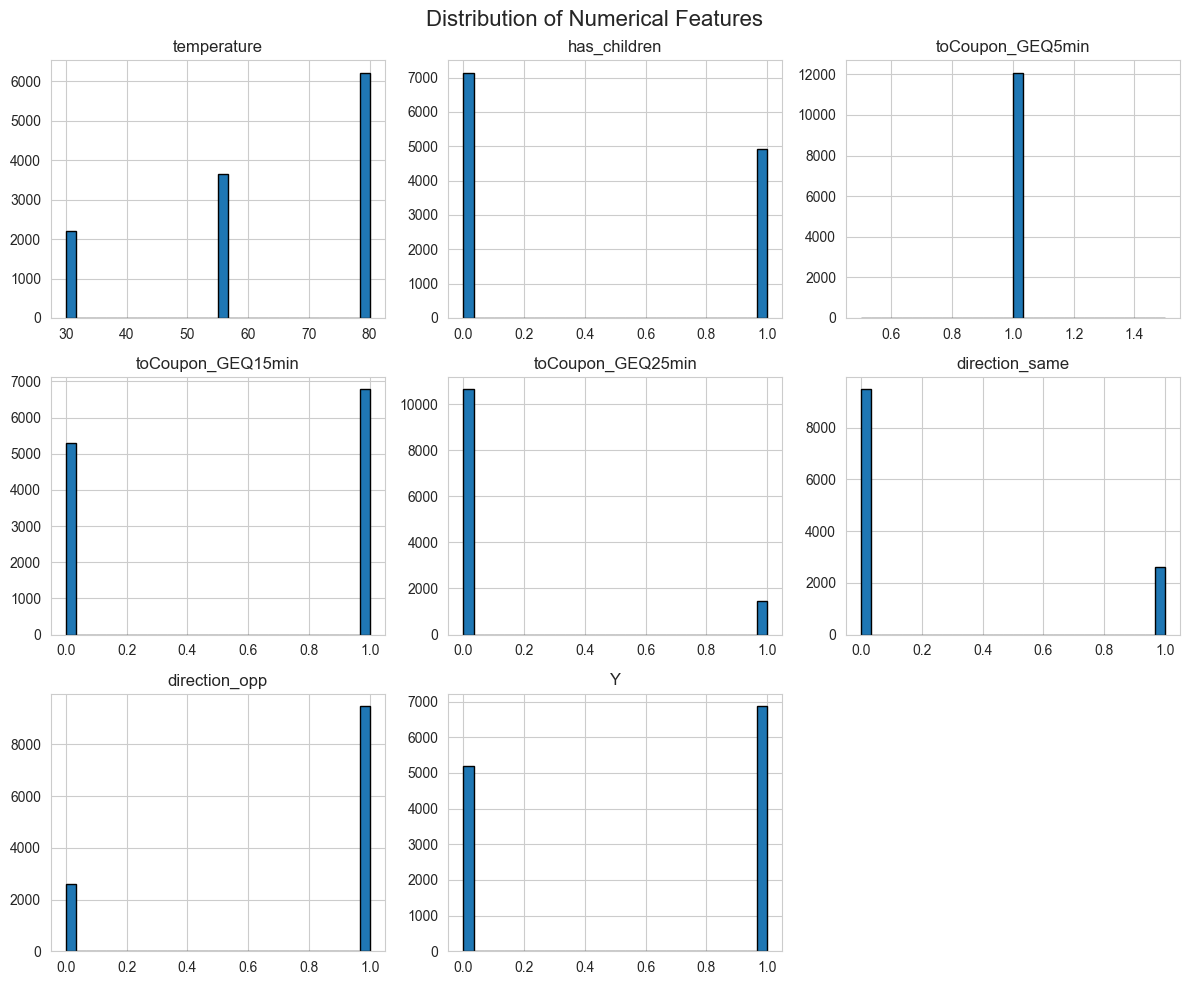

In [140]:
#numeric_cols = X.select_dtypes(include=['number'])

(X.hist(
    bins=30, figsize=(12, 10), edgecolor='black'
))
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()
#We see

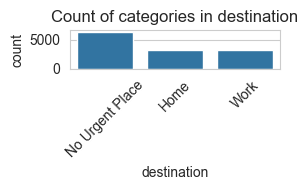

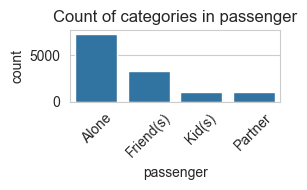

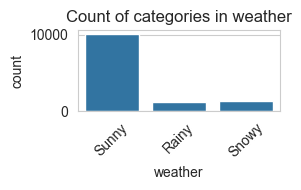

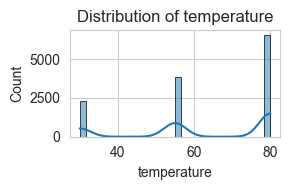

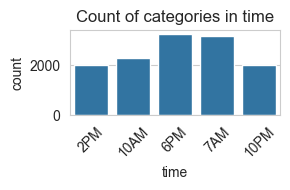

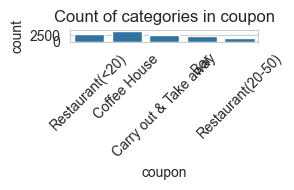

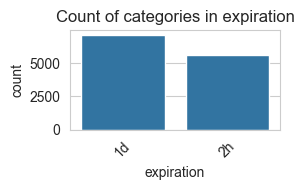

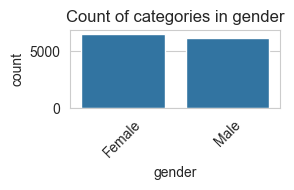

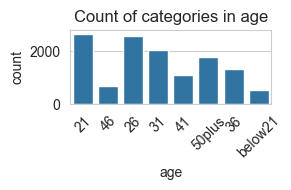

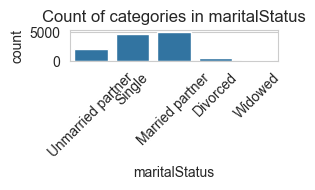

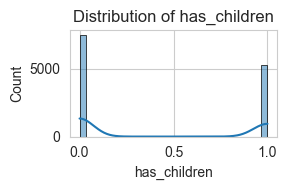

/var/folders/jg/ymy7y6pd27337l_sk7fr_rsr0000gn/T/ipykernel_16217/461056468.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


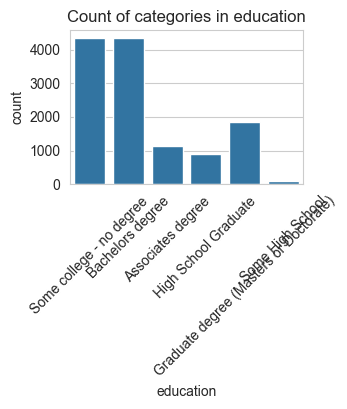

/var/folders/jg/ymy7y6pd27337l_sk7fr_rsr0000gn/T/ipykernel_16217/461056468.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


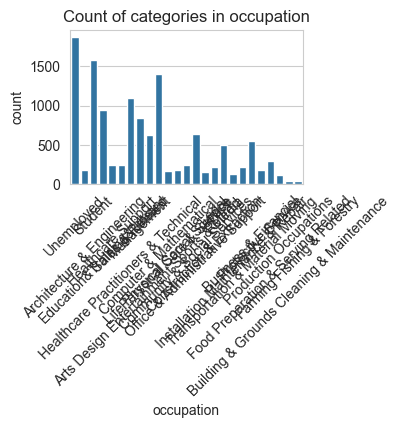

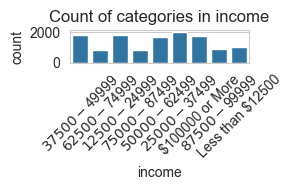

/var/folders/jg/ymy7y6pd27337l_sk7fr_rsr0000gn/T/ipykernel_16217/461056468.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


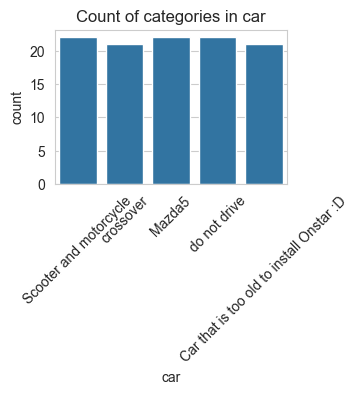

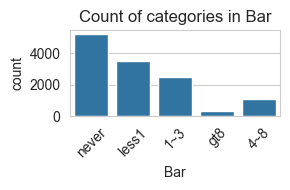

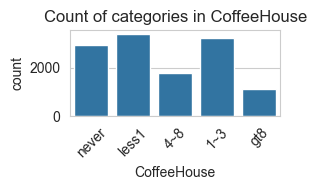

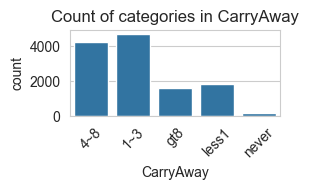

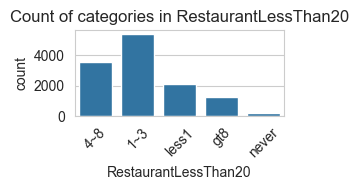

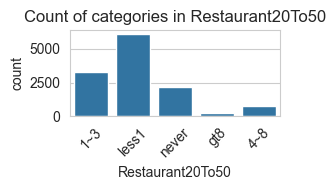

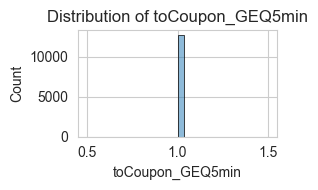

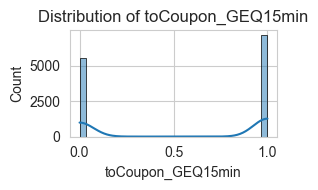

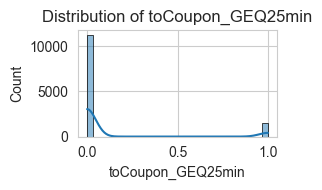

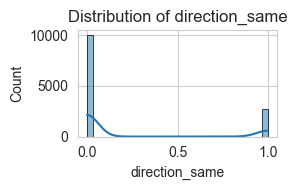

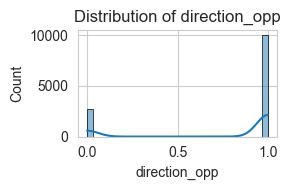

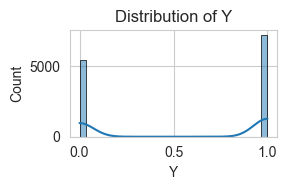

In [173]:

for col in X.columns:
    plt.figure(figsize=(3,2))
    if pd.api.types.is_numeric_dtype(X[col]):
        sns.histplot(X[col], bins=30, kde=True, edgecolor='black')
        plt.title(f'Distribution of {col}')
    else:
        sns.countplot(x=X[col])
        plt.title(f'Count of categories in {col}')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


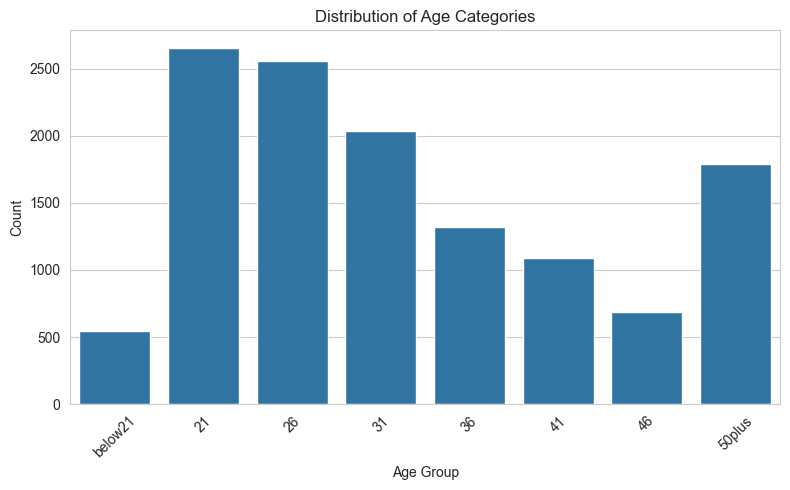

In [185]:
# Define desired order for 'age' column
age_order = ['below21', '21', '26', '31', '36', '41', '46', '50plus']

# Convert 'age' column to ordered categorical
X['age'] = pd.Categorical(X['age'], categories=age_order, ordered=True)

# Plot age distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='age', data=X, order=age_order)
plt.title('Distribution of Age Categories')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


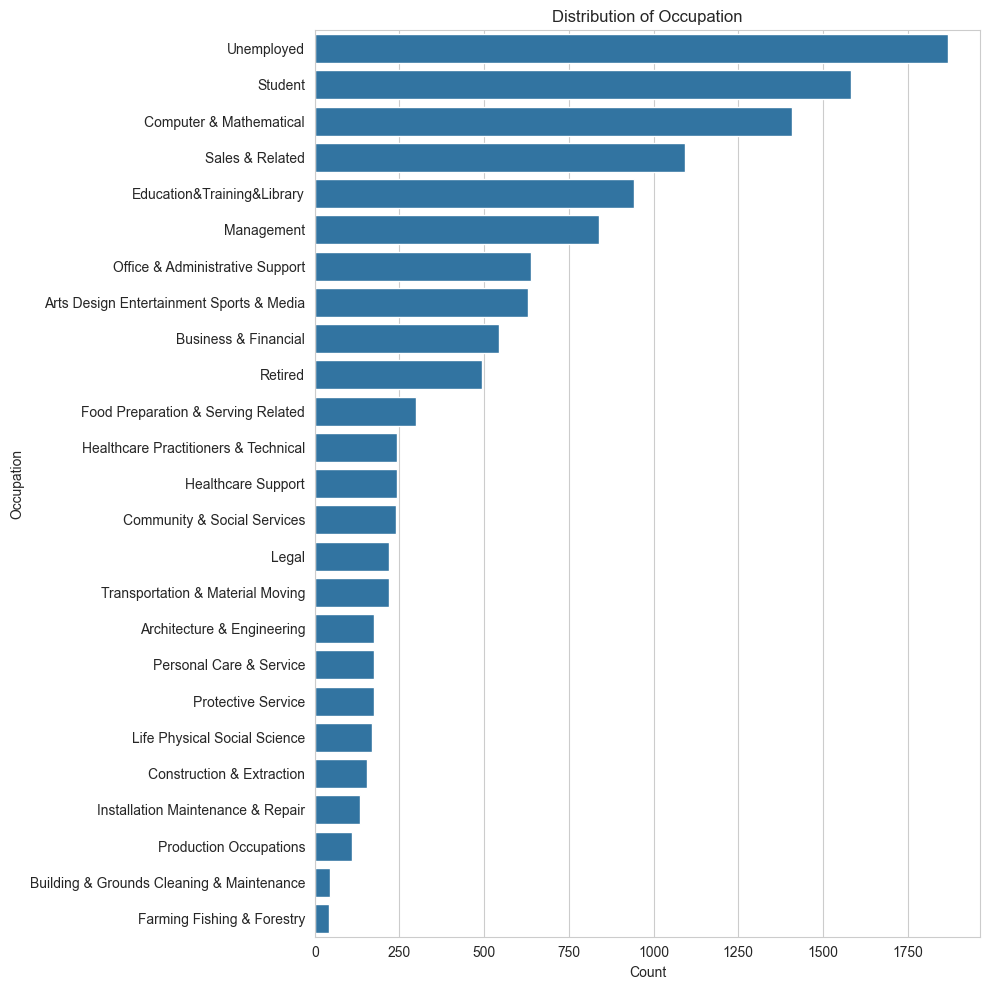

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of occupation (many categories → vertical display)
plt.figure(figsize=(10, 10))
sns.countplot(y=X['occupation'], order=X['occupation'].value_counts().index)
plt.title('Distribution of Occupation')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.tight_layout()
plt.show()


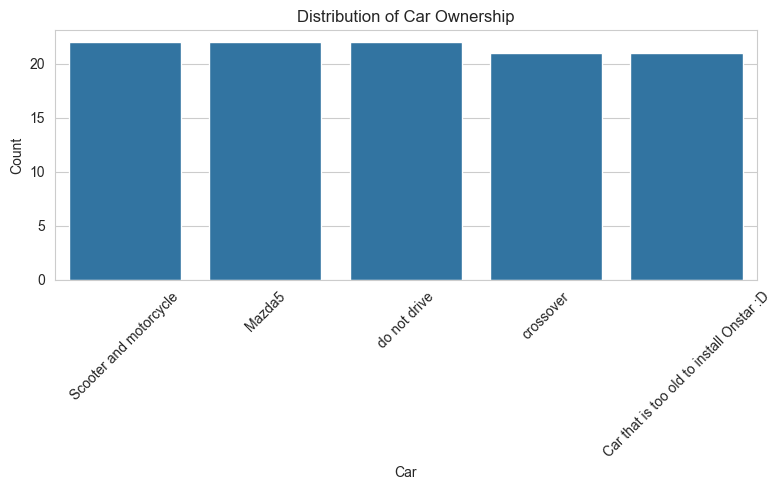

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of car
plt.figure(figsize=(8, 5))
sns.countplot(x=X['car'], order=X['car'].value_counts().index)
plt.title('Distribution of Car Ownership')
plt.xlabel('Car')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
